<a href="https://colab.research.google.com/github/Az-Rof/House-Sale-Prediction/blob/main/House_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDIKSI HARGA RUMAH MENGGUNAKAN GRADIENT BOOSTING

[1/6] Loading dataset...
Using Colab cache for faster access to the 'housesalesprediction' dataset.
Dataset loaded: 21613 rows, 21 columns

[2/6] Preparing data...
Features: 20 columns
Target: price (min: $75,000, max: $7,700,000)

[3/6] Splitting data...
Training set: 17290 samples
Test set: 4323 samples

[4/6] Training Gradient Boosting model...
This may take a few minutes...
Model trained successfully!

[5/6] Evaluating model performance...

MODEL PERFORMANCE METRICS

Metric               Training Set         Test Set            
------------------------------------------------------------
RMSE                 $         84,502.14 $        143,547.58
MAE                  $         56,707.57 $         71,768.21
R² Score                          0.9453              0.8637
Accuracy                          94.53%              86.37%

[6/6] Analyzing feature importance...

TOP 10 MOST IMPORTANT FEATURES

Rank   Feature              Impo

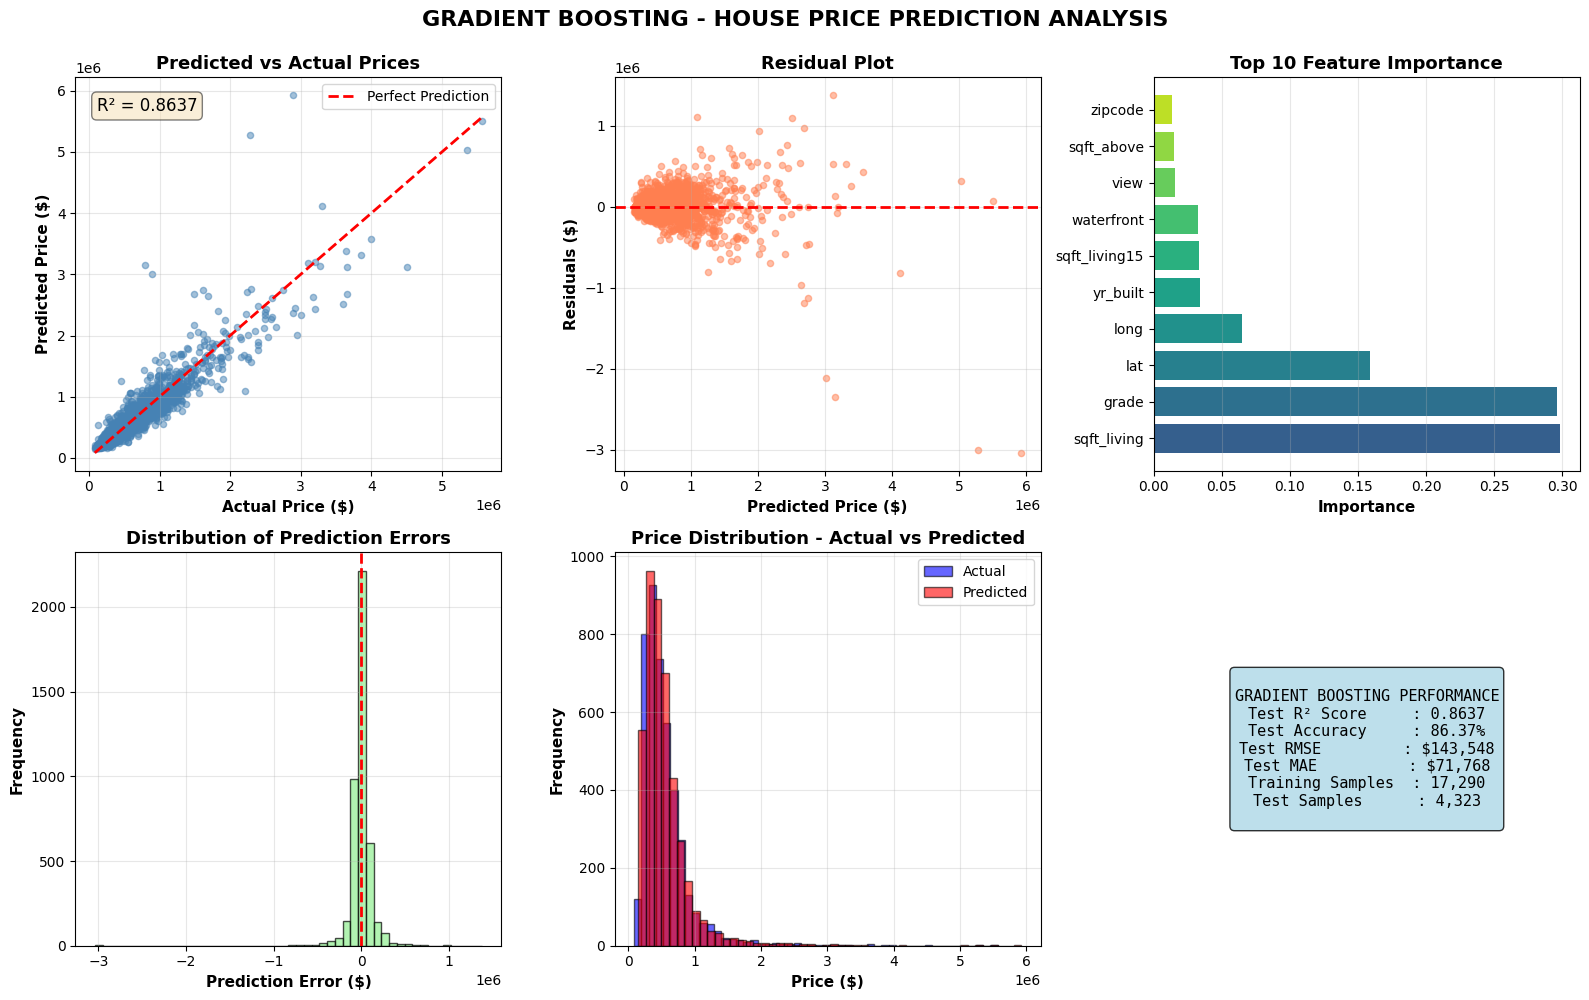


SAVING MODEL

EXAMPLE: HOW TO PREDICT NEW HOUSE PRICE

Sample House Features:
--------------------------------------------------------------------------------
  bedrooms            : 4
  bathrooms           : 2.25
  sqft_living         : 2070
  sqft_lot            : 8893
  floors              : 2.0
  waterfront          : 0
  view                : 0
  condition           : 4
  grade               : 8
  sqft_above          : 2070
  sqft_basement       : 0
  yr_built            : 1986
  yr_renovated        : 0
  zipcode             : 98058
  lat                 : 47.4388
  long                : -122.162
  sqft_living15       : 2390
  sqft_lot15          : 7700
  sale_year           : 2014
  sale_month          : 10

Prediction Result:
--------------------------------------------------------------------------------
  Predicted Price    : $377,088.81
  Actual Price       : $365,000.00
  Difference         : $12,088.81
  Error Percentage   : 3.31%

ANALYSIS COMPLETE!

Summary:
  • Model Ac

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

print("="*80)
print("PREDIKSI HARGA RUMAH MENGGUNAKAN GRADIENT BOOSTING")
print("="*80)

# ==============================================================================
# 1. LOAD DATA
# ==============================================================================
print("\n[1/6] Loading dataset...")
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
df = pd.read_csv(path + "/kc_house_data.csv")
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# ==============================================================================
# 2. DATA PREPARATION
# ==============================================================================
print("\n[2/6] Preparing data...")

# Clean date column and extract features
df['date'] = pd.to_datetime(df['date'].str[0:8], format='%Y%m%d')
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month

# Separate features and target
X = df.drop(columns=['id', 'date', 'price'])
y = df['price']

print(f"Features: {X.shape[1]} columns")
print(f"Target: price (min: ${y.min():,.0f}, max: ${y.max():,.0f})")

# ==============================================================================
# 3. TRAIN-TEST SPLIT
# ==============================================================================
print("\n[3/6] Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# ==============================================================================
# 4. TRAIN GRADIENT BOOSTING MODEL
# ==============================================================================
print("\n[4/6] Training Gradient Boosting model...")
print("This may take a few minutes...")

# Initialize model with optimized parameters
gb_model = GradientBoostingRegressor(
    n_estimators=100,           # Number of boosting stages
    learning_rate=0.1,          # Shrinks contribution of each tree
    max_depth=5,                # Maximum depth of trees
    min_samples_split=2,        # Minimum samples to split node
    min_samples_leaf=1,         # Minimum samples at leaf node
    subsample=0.8,              # Fraction of samples for fitting
    random_state=42,
    verbose=0
)

# Train the model
gb_model.fit(X_train, y_train)
print("Model trained successfully!")

# ==============================================================================
# 5. EVALUATE MODEL
# ==============================================================================
print("\n[5/6] Evaluating model performance...")

# Make predictions
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS")
print("="*80)
print(f"\n{'Metric':<20} {'Training Set':<20} {'Test Set':<20}")
print("-"*60)
print(f"{'RMSE':<20} ${train_rmse:>18,.2f} ${test_rmse:>18,.2f}")
print(f"{'MAE':<20} ${train_mae:>18,.2f} ${test_mae:>18,.2f}")
print(f"{'R² Score':<20} {train_r2:>19.4f} {test_r2:>19.4f}")
print(f"{'Accuracy':<20} {train_r2*100:>18.2f}% {test_r2*100:>18.2f}%")

# ==============================================================================
# 6. FEATURE IMPORTANCE
# ==============================================================================
print("\n[6/6] Analyzing feature importance...")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*80)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*80)
print(f"\n{'Rank':<6} {'Feature':<20} {'Importance':<15} {'Description':<30}")
print("-"*80)

feature_descriptions = {
    'sqft_living': 'Luas area hunian',
    'grade': 'Kualitas bangunan',
    'lat': 'Latitude (lokasi)',
    'long': 'Longitude (lokasi)',
    'sqft_above': 'Luas di atas tanah',
    'sqft_living15': 'Luas hunian tetangga',
    'bathrooms': 'Jumlah kamar mandi',
    'view': 'Kualitas view',
    'sqft_basement': 'Luas basement',
    'bedrooms': 'Jumlah kamar tidur',
    'waterfront': 'Tepi air (0/1)',
    'yr_built': 'Tahun dibangun',
    'zipcode': 'Kode pos',
    'condition': 'Kondisi rumah',
    'yr_renovated': 'Tahun renovasi',
    'sqft_lot': 'Luas tanah',
    'floors': 'Jumlah lantai',
    'sqft_lot15': 'Luas tanah tetangga',
    'sale_year': 'Tahun penjualan',
    'sale_month': 'Bulan penjualan'
}

for i, row in enumerate(feature_importance.head(10).itertuples(), 1):
    desc = feature_descriptions.get(row.Feature, '-')
    print(f"{i:<6} {row.Feature:<20} {row.Importance:<15.4f} {desc:<30}")

# ==============================================================================
# 7. SAMPLE PREDICTIONS
# ==============================================================================
print("\n" + "="*80)
print("SAMPLE PREDICTIONS (First 10 from Test Set)")
print("="*80)

sample_df = pd.DataFrame({
    'Actual Price': y_test.iloc[:10].values,
    'Predicted Price': y_test_pred[:10],
    'Difference': y_test.iloc[:10].values - y_test_pred[:10],
    'Error %': np.abs((y_test.iloc[:10].values - y_test_pred[:10]) / y_test.iloc[:10].values * 100)
})

print(f"\n{'#':<4} {'Actual Price':<15} {'Predicted Price':<18} {'Difference':<15} {'Error %':<10}")
print("-"*70)
for i, row_data in enumerate(sample_df.iterrows(), 1):
    # row_data is a tuple of (index, Series) where Series contains column values
    actual = f"${row_data[1]['Actual Price']:,.0f}"
    predicted = f"${row_data[1]['Predicted Price']:,.0f}"
    diff = f"${row_data[1]['Difference']:,.0f}"
    error = f"{row_data[1]['Error %']:.2f}%"
    print(f"{i:<4} {actual:<15} {predicted:<18} {diff:<15} {error:<10}")

# ==============================================================================
# 8. VISUALIZATIONS
# ==============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(16, 10))

# 1. Predicted vs Actual
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y_test, y_test_pred, alpha=0.5, s=20, color='steelblue')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Price ($)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Predicted Price ($)', fontsize=11, fontweight='bold')
ax1.set_title('Predicted vs Actual Prices', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.text(0.05, 0.95, f'R² = {test_r2:.4f}', transform=ax1.transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residuals Plot
ax2 = plt.subplot(2, 3, 2)
residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, residuals, alpha=0.5, s=20, color='coral')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Price ($)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Residuals ($)', fontsize=11, fontweight='bold')
ax2.set_title('Residual Plot', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Feature Importance
ax3 = plt.subplot(2, 3, 3)
top_features = feature_importance.head(10)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
bars = ax3.barh(top_features['Feature'], top_features['Importance'], color=colors)
ax3.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax3.set_title('Top 10 Feature Importance', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Error Distribution
ax4 = plt.subplot(2, 3, 4)
errors = y_test - y_test_pred
ax4.hist(errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax4.axvline(x=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Prediction Error ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Distribution of Prediction Errors', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. Price Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(y_test, bins=50, alpha=0.6, color='blue', label='Actual', edgecolor='black')
ax5.hist(y_test_pred, bins=50, alpha=0.6, color='red', label='Predicted', edgecolor='black')
ax5.set_xlabel('Price ($)', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title('Price Distribution - Actual vs Predicted', fontsize=13, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)

# 6. Performance Metrics
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
metrics_text = f"""
GRADIENT BOOSTING PERFORMANCE
Test R² Score     : {test_r2:.4f}
Test Accuracy     : {test_r2*100:.2f}%
Test RMSE         : ${test_rmse:,.0f}
Test MAE          : ${test_mae:,.0f}
Training Samples  : {X_train.shape[0]:,}
Test Samples      : {X_test.shape[0]:,}
"""
ax6.text(0.5, 0.5, metrics_text, fontsize=11, ha='center', va='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.suptitle('GRADIENT BOOSTING - HOUSE PRICE PREDICTION ANALYSIS',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('gradient_boosting_predictions.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'gradient_boosting_predictions.png'")
plt.show()

# ==============================================================================
# 9. SAVE MODEL (Optional)
# ==============================================================================
print("\n" + "="*80)
print("SAVING MODEL")
print("="*80)

# try:
#     joblib.dump(gb_model, 'house_price_gb_model.pkl')
#     print("Model saved as 'house_price_gb_model.pkl'")
#     print("You can load it later using: model = joblib.load('house_price_gb_model.pkl')")
# except Exception as e:
#     print(f"Could not save model: {e}")

# ==============================================================================
# 10. PREDICTION EXAMPLE
# ==============================================================================
print("\n" + "="*80)
print("EXAMPLE: HOW TO PREDICT NEW HOUSE PRICE")
print("="*80)

# Get a sample house from test set
sample_house = X_test.iloc[0:1]
sample_actual_price = y_test.iloc[0]

# Make prediction
predicted_price = gb_model.predict(sample_house)[0]

print("\nSample House Features:")
print("-"*80)
for col in sample_house.columns:
    print(f"  {col:<20}: {sample_house[col].values[0]}")

print("\nPrediction Result:")
print("-"*80)
print(f"  Predicted Price    : ${predicted_price:,.2f}")
print(f"  Actual Price       : ${sample_actual_price:,.2f}")
print(f"  Difference         : ${abs(predicted_price - sample_actual_price):,.2f}")
print(f"  Error Percentage   : {abs((predicted_price - sample_actual_price) / sample_actual_price * 100):.2f}%")
print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nSummary:")
print(f"  • Model Accuracy: {test_r2*100:.2f}%")
print(f"  • Average Error: ${test_mae:,.0f}")
print(f"  • Best For: Predicting house prices in King County, WA")
print(f"  • Top 3 Factors: {', '.join(feature_importance.head(3)['Feature'].tolist())}")
print("="*80)
